# Eksploracja Danych - Projekt
Tomasz Kiljańczyk (136257)

Wojciech Lulek (136280)

Model download link: https://github.com/ZER-0-NE/EAST-Detector-for-text-detection-using-OpenCV/raw/master/frozen_east_text_detection.pb

In [7]:
import os
from multiprocessing import Pool

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm_notebook

In [8]:
us_trending_df = pd.read_csv('./data/us_trending_stage_1.csv').head(1000)
us_trending_df

,channelId,channelTitle,trending_date,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,...,title_capital_letters,title_punctuaction,description_height,description_length,description_link_count,tag_count,publishedAtHour,publishedAtDay,publishedAtMonth,publishedAtHoliday
0,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,2020-08-12,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,...,0.735294,0.088235,7,361,3,15,19,1,8,False
1,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,2020-08-12,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,...,0.100000,0.016667,0,715,4,25,17,1,8,False
2,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,2020-08-12,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,...,0.094340,0.018868,0,513,7,30,16,1,8,False
3,UCbg_UMjlHJg_19SZckaKajg,XXL,2020-08-12,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,...,0.142857,0.017857,5,762,6,23,16,1,8,False
4,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,2020-08-12,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,...,0.200000,0.018182,0,2493,35,33,15,1,8,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,UC7Ul2k3EhfIHE2RFvjoMorA,Aliya Janell,2020-08-16,443572,40384,388,1334,https://i.ytimg.com/vi/8QsH_xPQFqM/default.jpg,False,False,...,0.214286,0.047619,0,793,5,4,19,0,8,False
996,UC3L9XPe0_FGfRG-CMGtBvFg,JxmyHighroller,2020-08-16,1631138,65497,1806,7393,https://i.ytimg.com/vi/jp47GeO6k6Q/default.jpg,False,False,...,0.225806,0.032258,0,975,2,28,18,6,8,False
997,UCLXzq85ijg2LwJWFrz4pkmw,Skip and Shannon: UNDISPUTED,2020-08-16,592569,7456,318,1687,https://i.ytimg.com/vi/n_8hxS_7Vis/default.jpg,False,False,...,0.180000,0.050000,0,2104,17,42,16,1,8,False
998,UCF_votze88WRDSEREe9s3aQ,Dylan Is In Trouble,2020-08-16,504902,48747,266,3422,https://i.ytimg.com/vi/FQnJRVn3QVk/default.jpg,False,False,...,0.133333,0.050000,1,242,2,15,16,0,8,False


In [9]:
us_trending_df['thumbnail_link_hires'] = us_trending_df['thumbnail_link'].str.replace('default.jpg', '0.jpg')
urls = us_trending_df['thumbnail_link_hires']
unique_urls = us_trending_df['thumbnail_link_hires'].unique()
us_trending_df['thumbnail_link_hires']

0      https://i.ytimg.com/vi/3C66w5Z0ixs/0.jpg
1      https://i.ytimg.com/vi/M9Pmf9AB4Mo/0.jpg
2      https://i.ytimg.com/vi/J78aPJ3VyNs/0.jpg
3      https://i.ytimg.com/vi/kXLn3HkpjaA/0.jpg
4      https://i.ytimg.com/vi/VIUo6yapDbc/0.jpg
                         ...                   
995    https://i.ytimg.com/vi/8QsH_xPQFqM/0.jpg
996    https://i.ytimg.com/vi/jp47GeO6k6Q/0.jpg
997    https://i.ytimg.com/vi/n_8hxS_7Vis/0.jpg
998    https://i.ytimg.com/vi/FQnJRVn3QVk/0.jpg
999    https://i.ytimg.com/vi/goOmZUwQYlA/0.jpg
Name: thumbnail_link_hires, Length: 1000, dtype: object

In [10]:
from notebooks.workers import extract_color_features
from PIL import Image

results = []

with Pool(processes=os.cpu_count()) as pool:
    for res in tqdm_notebook(pool.imap(extract_color_features, unique_urls), total=unique_urls.size):
        results.append(res)

color_features_dict = dict(results)

color_features = [color_features_dict[url] for url in urls]

image_dataframe = pd.DataFrame(color_features)
image_dataframe

  0%|          | 0/337 [00:00<?, ?it/s]

,thumbnail_med_hue,thumbnail_med_saturation,thumbnail_med_value,thumbnail_avg_hue,thumbnail_avg_saturation,thumbnail_avg_value,thumbnail_colorfulness
0,8.763230,43.0,221.0,10.694400,65.424074,210.375910,66.348474
1,5.234862,170.0,77.0,5.638825,155.236235,108.250185,85.949258
2,10.262640,98.0,131.0,17.777409,107.066312,136.325486,44.869976
3,7.206359,67.0,152.0,7.659785,87.958986,149.524666,69.070325
4,8.173923,82.0,178.0,7.954971,106.599923,166.311347,76.217238
...,...,...,...,...,...,...,...
995,169.809531,110.0,131.0,173.522037,117.622148,120.035555,68.295012
996,178.888183,80.0,141.0,175.098846,91.953249,129.371626,36.670702
997,162.127240,136.0,62.0,156.047784,130.401620,90.472407,64.519119
998,6.165751,50.0,219.0,4.646312,70.920464,195.003098,68.414455


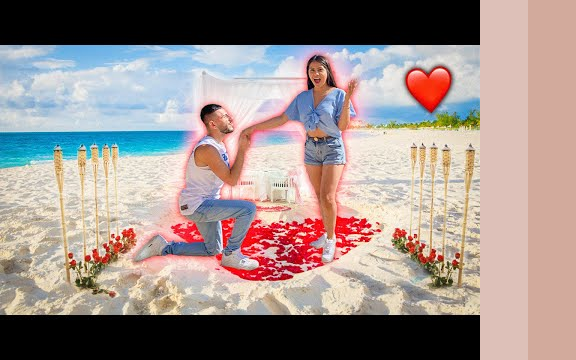

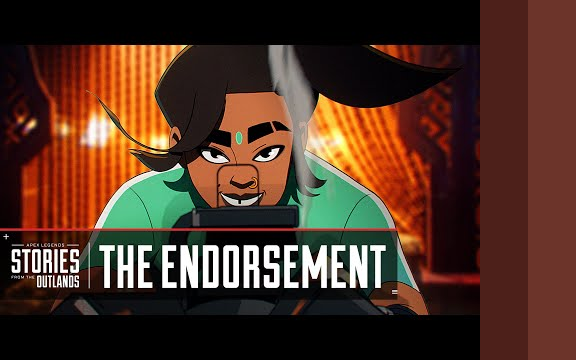

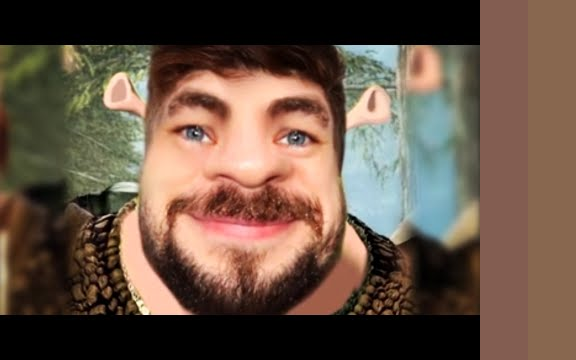

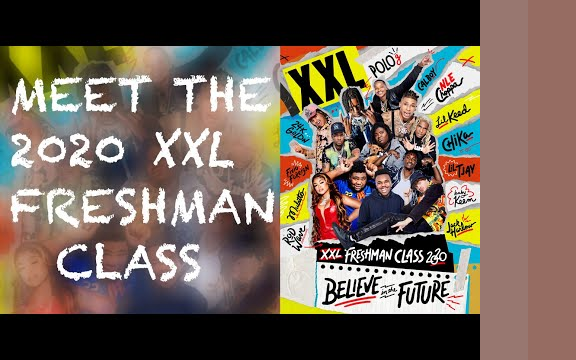

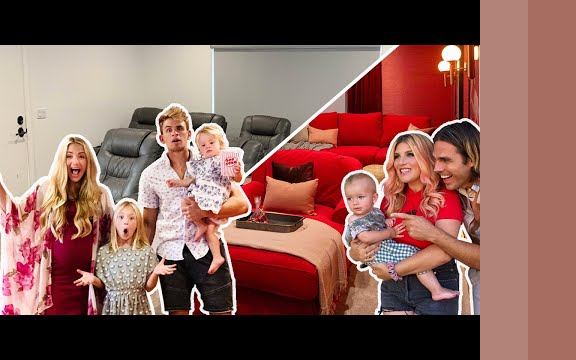

In [11]:
def get_concat_h(im1, im2):
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst


for i, url in enumerate(urls.head(5)):
    file_path = f'./images/{url.split("/")[-2]}.jpg'

    image = Image.open(file_path)

    row = image_dataframe.iloc[i]
    median_hsv_color = (
        round(row['thumbnail_med_hue']),
        round(row['thumbnail_med_saturation']),
        round(row['thumbnail_med_value'])
    )
    avg_hsv_color = (
        round(row['thumbnail_avg_hue']),
        round(row['thumbnail_avg_saturation']),
        round(row['thumbnail_avg_value'])
    )

    dims = (round(image.width * 0.1), image.height)
    median_color_image = Image.new('HSV', dims, color=median_hsv_color).convert('RGB')
    average_color_image = Image.new('HSV', dims, color=avg_hsv_color).convert('RGB')

    image_result_1 = get_concat_h(image, median_color_image)
    image_result_1 = get_concat_h(image_result_1, average_color_image)

    display(image_result_1)

In [12]:
from notebooks.workers import detect_text

results = []
with Pool(processes=os.cpu_count()) as pool:
    for res in tqdm_notebook(pool.imap(detect_text, unique_urls), total=unique_urls.size):
        results.append(res)

text_features_dict = dict(results)

  0%|          | 0/337 [00:00<?, ?it/s]

In [13]:
has_text = [text_features_dict.get(url, (False,))[0] for url in urls]
text_count = [text_features_dict.get(url, (None, 0))[1] for url in urls]
largest_text_to_image_area_ratio = [text_features_dict.get(url, (None, 0, 0))[2] for url in urls]

In [14]:
has_text_df = pd.DataFrame(has_text, columns=['thumbnail_has_text'])
has_text_df

,thumbnail_has_text
0,False
1,False
2,False
3,False
4,False
...,...
995,False
996,False
997,False
998,False


In [15]:
text_count_df = pd.DataFrame(text_count, columns=['thumbnail_text_count'])
text_count_df

,thumbnail_text_count
0,0
1,0
2,0
3,0
4,0
...,...
995,0
996,0
997,0
998,0


In [16]:
largest_text_to_image_area_ratio_df = pd.DataFrame(largest_text_to_image_area_ratio,
                                                   columns=['thumbnail_largest_text_to_image_area_ratio'])
largest_text_to_image_area_ratio_df

,thumbnail_largest_text_to_image_area_ratio
0,0
1,0
2,0
3,0
4,0
...,...
995,0
996,0
997,0
998,0


In [17]:
final_df = pd.concat([image_dataframe, has_text_df], axis=1)
final_df = pd.concat([final_df, text_count_df], axis=1)
final_df = pd.concat([final_df, largest_text_to_image_area_ratio_df], axis=1)
final_df

,thumbnail_med_hue,thumbnail_med_saturation,thumbnail_med_value,thumbnail_avg_hue,thumbnail_avg_saturation,thumbnail_avg_value,thumbnail_colorfulness,thumbnail_has_text,thumbnail_text_count,thumbnail_largest_text_to_image_area_ratio
0,8.763230,43.0,221.0,10.694400,65.424074,210.375910,66.348474,False,0,0
1,5.234862,170.0,77.0,5.638825,155.236235,108.250185,85.949258,False,0,0
2,10.262640,98.0,131.0,17.777409,107.066312,136.325486,44.869976,False,0,0
3,7.206359,67.0,152.0,7.659785,87.958986,149.524666,69.070325,False,0,0
4,8.173923,82.0,178.0,7.954971,106.599923,166.311347,76.217238,False,0,0
...,...,...,...,...,...,...,...,...,...,...
995,169.809531,110.0,131.0,173.522037,117.622148,120.035555,68.295012,False,0,0
996,178.888183,80.0,141.0,175.098846,91.953249,129.371626,36.670702,False,0,0
997,162.127240,136.0,62.0,156.047784,130.401620,90.472407,64.519119,False,0,0
998,6.165751,50.0,219.0,4.646312,70.920464,195.003098,68.414455,False,0,0


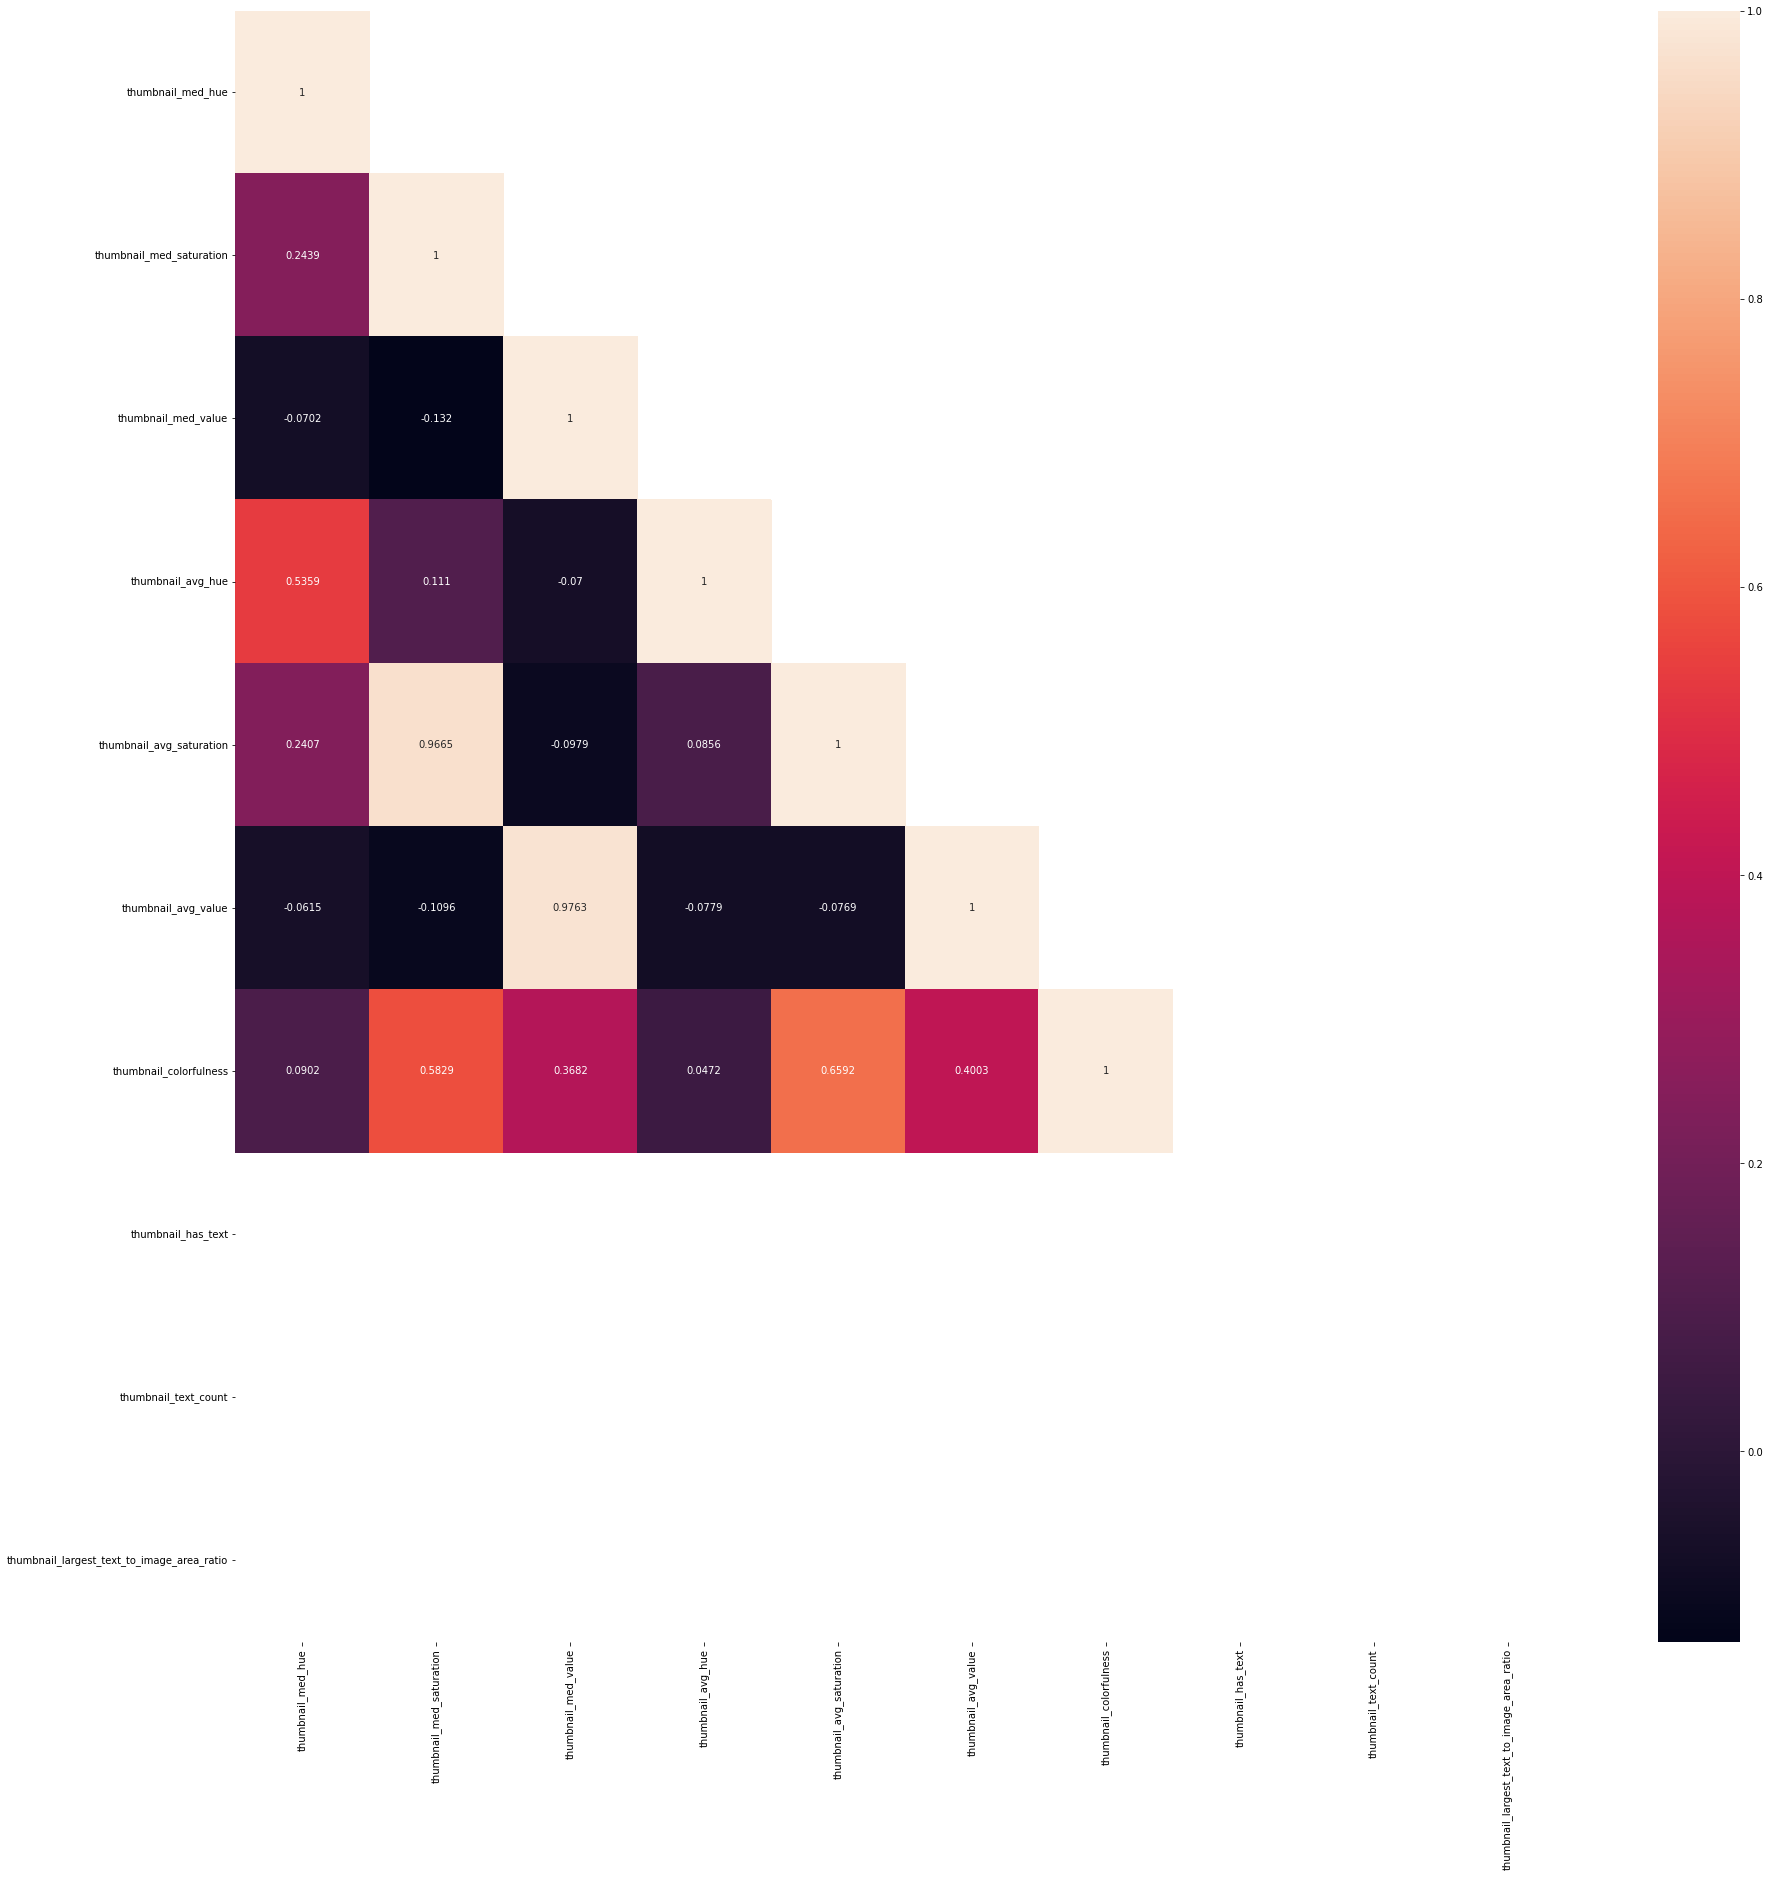

In [18]:
corrMatrix = final_df.corr(method='spearman')
corrMatrix = corrMatrix.round(4)

mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
np.fill_diagonal(mask, False)

fig, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(corrMatrix, mask=mask, annot=True, fmt='g', ax=ax)
plt.show()

In [19]:
final_df.to_csv("./stage_2_thumbnail_colors_and_text.csv", index=False)